# Test orbit file (LED) reading and Hermite interpolation

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
%matplotlib inline

In [3]:
import pandas as pd

def read_orb(ldrfile):
    """
    Read an LED file and extract the metadata and data into a dictionary and a DataFrame.

    Parameters:
    ldrfile (str): Path to the LED file.

    Returns:
    tuple: A tuple containing the metadata dictionary and the data DataFrame.

    Metadata Dictionary:
    - 'nd' (str): Number of given points in the list.
    - 'iy' (str): Year.
    - 'id' (str): Julian day.
    - 'isec' (str): Seconds of the day.
    - 'idsec' (str): Delta seconds.

    Data DataFrame:
    - 'iy' (int): Year.
    - 'id' (int): Julian day.
    - 'isec' (float): Seconds of the day.
    - 'px' (float): X-coordinate.
    - 'py' (float): Y-coordinate.
    - 'pz' (float): Z-coordinate.
    - 'vx' (float): X-velocity.
    - 'vy' (float): Y-velocity.
    - 'vz' (float): Z-velocity.
    """

    with open(ldrfile, 'r') as file:
        first_line = file.readline()
    columns = ['nd', 'iy', 'id', 'isec', 'idsec']
    meta = dict(zip(columns, first_line.split()))

    # Define the column headers based on the structure in the code
    headers = ['iy', 'id', 'isec', 'px', 'py', 'pz', 'vx', 'vy', 'vz']
    # Read the file with pandas, specifying space as the delimiter and skipping the first row
    df = pd.read_csv(ldrfile, delimiter=' ', header=None, skiprows=1, names=headers, index_col=False)
    df.attrs = meta
    
    return df

orb = read_orb('S1_20150521_ALL_F1.LED')

print(orb.attrs)
orb

{'nd': '281', 'iy': '2015', 'id': '140', 'isec': '48064.000000', 'idsec': '10.000'}


,iy,id,isec,px,py,pz,vx,vy,vz
0,2015,140,48064.0,1.941649e+06,2.690324e+06,6.239974e+06,-1656.759849,-6599.833496,3353.575432
1,2015,140,48074.0,1.924925e+06,2.624189e+06,6.273157e+06,-1688.050184,-6627.146750,3283.006276
2,2015,140,48084.0,1.907889e+06,2.557784e+06,6.305632e+06,-1719.190204,-6653.671699,3212.068735
3,2015,140,48094.0,1.890542e+06,2.491118e+06,6.337397e+06,-1750.175288,-6679.405648,3140.770806
4,2015,140,48104.0,1.872886e+06,2.424198e+06,6.368447e+06,-1781.000831,-6704.345996,3069.120523
...,...,...,...,...,...,...,...,...,...
276,2015,140,50824.0,-3.004528e+06,-3.385614e+06,-5.445894e+06,2234.108457,5529.166846,-4673.002701
277,2015,140,50834.0,-2.981980e+06,-3.330151e+06,-5.492317e+06,2275.548048,5563.291422,-4611.613522
278,2015,140,50844.0,-2.959018e+06,-3.274350e+06,-5.538124e+06,2316.780830,5596.733029,-4549.711427
279,2015,140,50854.0,-2.935645e+06,-3.218219e+06,-5.583310e+06,2357.801267,5629.488363,-4487.303403


In [4]:
orb.isec[:10].values

array([48064., 48074., 48084., 48094., 48104., 48114., 48124., 48134.,
       48144., 48154.])

In [5]:
orb.px[:10].values

array([1941649.304103, 1924925.130555, 1907888.801379, 1890541.842833,
       1872885.827312, 1854922.373199, 1836653.144729, 1818079.851828,
       1799204.249944, 1780028.139872])

In [6]:
orb.vx[:10].values

array([-1656.759849, -1688.050184, -1719.190204, -1750.175288,
       -1781.000831, -1811.662241, -1842.15494 , -1872.474369,
       -1902.615983, -1932.575255])

In [7]:
import numpy as np
from numpy.polynomial.hermite import hermfit, hermval

# Define the data points
x = orb.isec[:10].values
y = orb.px[:10].values
z = orb.vx[:10].values

# Fit the Hermite polynomial
coeff = hermfit(x, y, 5)

for test_x in [48070.000000, 48078.000000, 48086.000000, 48092.000000, 48102.000000,
        48118.000000, 48128.000000, 48138.000000, 48150.000000, 48160.000000]:
    # Perform the interpolation
    y_interpolated = hermval(test_x, coeff)
    # Output the interpolated value
    print(f'Interpolated value at x={test_x}: ', y_interpolated)

Interpolated value at x=48070.0:  1931652.3436279297
Interpolated value at x=48078.0:  1918147.973815918
Interpolated value at x=48086.0:  1904444.2108154297
Interpolated value at x=48092.0:  1894036.0103759766
Interpolated value at x=48102.0:  1876441.6782836914
Interpolated value at x=48118.0:  1847651.2810668945
Interpolated value at x=48128.0:  1829260.2188110352
Interpolated value at x=48138.0:  1810565.7890014648
Interpolated value at x=48150.0:  1787734.5283203125
Interpolated value at x=48160.0:  1768378.997619629


/opt/homebrew/lib/python3.10/site-packages/numpy/polynomial/hermite.py:1404: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


In [8]:
%timeit hermval(test_x, coeff)

1.3 µs ± 5.47 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## extend_orbit

In [9]:
# extend the LED orbit records
!extend_orbit S1_20150521_ALL_F1.LED S1_20150521_ALL_F1.extend.LED 0.25

In [10]:
orb = read_orb('S1_20150521_ALL_F1.LED')
orb_extend = read_orb('S1_20150521_ALL_F1.extend.LED')

In [11]:
orb_extend

,iy,id,isec,px,py,pz,vx,vy,vz
0,2015,140,47364.0,2.155312e+06,8.995849e+06,-7.113904e+05,1526.195265,-8865.539915,15004.669749
1,2015,140,47374.0,2.170276e+06,8.907191e+06,-5.621793e+05,1466.655397,-8866.011652,14837.659072
2,2015,140,47384.0,2.184646e+06,8.818529e+06,-4.146351e+05,1407.483011,-8866.210255,14671.277379
3,2015,140,47394.0,2.198427e+06,8.729867e+06,-2.687517e+05,1348.678105,-8866.135724,14505.524670
4,2015,140,47404.0,2.211621e+06,8.641208e+06,-1.245226e+05,1290.240680,-8865.788058,14340.400945
...,...,...,...,...,...,...,...,...,...
416,2015,140,51524.0,9.190270e+05,4.360970e+06,-7.606135e+06,8478.568519,14515.146149,-177.875603
417,2015,140,51534.0,1.004279e+06,4.506687e+06,-7.607441e+06,8571.900739,14628.298165,-83.228949
418,2015,140,51544.0,1.090466e+06,4.653536e+06,-7.607797e+06,8665.600440,14741.723314,12.046690
419,2015,140,51554.0,1.177592e+06,4.801522e+06,-7.607198e+06,8759.667622,14855.421598,107.951312


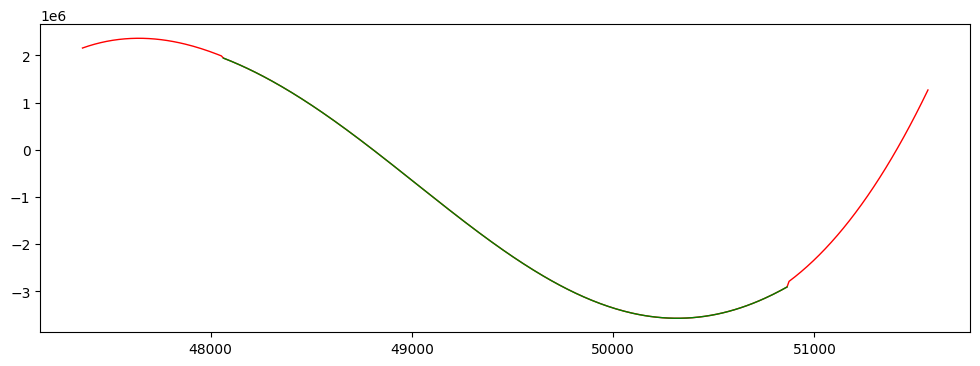

In [12]:
plt.figure(figsize=(12,4))
plt.plot(orb_extend.isec, orb_extend.px, c='red', lw=1)
plt.plot(orb.isec, orb.px, c='green', lw=1)

In [13]:
import numpy as np
from numpy.polynomial.hermite import hermfit, hermval

# Define the data points
x = orb.isec.values
y = orb.px.values
z = orb.vx.values

# Fit the Hermite polynomial
coeff = hermfit(x, y, 5)
vals_orig = hermval(orb_extend.isec, coeff)

In [14]:
import numpy as np
from numpy.polynomial.hermite import hermfit, hermval

# Define the data points
x = orb.isec.values[len(orb) // 4:-len(orb) // 4]
y = orb.px.values[len(orb) // 4:-len(orb) // 4]
z = orb.vx.values[len(orb) // 4:-len(orb) // 4]

# Fit the Hermite polynomial
coeff = hermfit(x, y, 5)

vals_half = hermval(orb.isec, coeff)

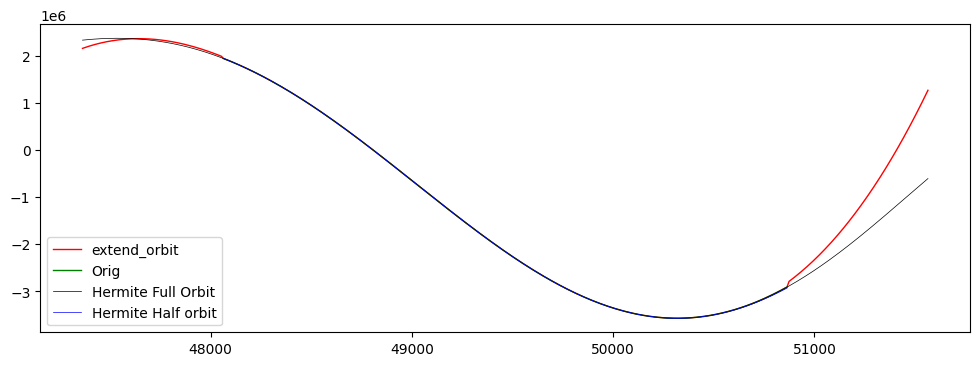

In [15]:
plt.figure(figsize=(12,4))
plt.plot(orb_extend.isec, orb_extend.px, c='red', lw=1, label='extend_orbit')
plt.plot(orb.isec, orb.px, c='green', lw=1, label='Orig')
plt.plot(orb_extend.isec, vals_orig, c='black', lw=0.5, label='Hermite Full Orbit')
plt.plot(orb.isec, vals_half, c='blue', lw=0.5, label='Hermite Half orbit')
plt.legend()
plt.show()

In [16]:
# check the extrapolation accuracy
vals_half/orb.px.values

0      1.000975
1      1.000893
2      1.000817
3      1.000744
4      1.000676
         ...   
276    1.006075
277    1.006462
278    1.006872
279    1.007306
280    1.007764
Name: isec, Length: 281, dtype: float64